In [9]:
import  numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import binom
import marimo as mo



# Génération des données

Fonction $x\mapsto \cos(10 x) e^{-x}$ avec un bruit Gaussien.


In [10]:
def inconnue(x): 
    return np.cos(10 *x) * np.exp(-x)


In [11]:
XL, XR = 0., 2.
bruit = 0.1
N = 20

XS = np.linspace(XL, XR, N)
YS = inconnue(XS) + bruit * np.random.randn(N)


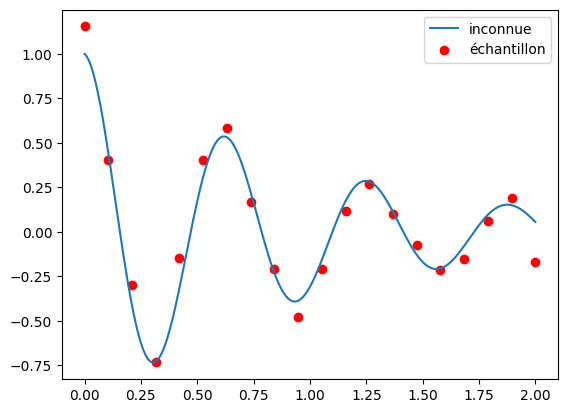

In [12]:
_xs = np.linspace(XL, XR, 200)
_ys = inconnue(_xs)

plt.plot(_xs, _ys, label='inconnue')
plt.scatter(XS, YS, color='red', label='échantillon')
plt.legend()

# Apprentissage

On vat approcher l'échantillon en utilisant 
    \n -Minimisant  l'erreur quadratique moyenne
    \n -avec les polynomes de degrés inférieur à d
    \n -en utlisant la base de Bernstein


$$
J_2(P)= \frac{1}{N} \sum_{i=1}^N (y_i - P(x_i))^2.
$$

$$
P(X) = \sum_{k=0}^d c_k \binom{d}{k} \left(\frac{x - a}{ b- a}\right)^{d} \left(1-\frac{x - a}{b - a}\right)^{d-k}
$$

In [13]:
class Bernstein:
    def __init__(self, degres, a, b):
        self.a = a
        self.b = b
        self.degres = degres
        self.coefficients = np.zeros(degres + 1)

    def predict(self, xs):
        resultat = np.zeros_like(xs)
        variable= (xs - self.a) / (self.b - self.a)
        for (k, c) in enumerate(self.coefficients):
            resultat = resultat + c * binom(self.degres, k)* np.power(variable, k) * np. power( 1. - variable, self.degres - k)
        return resultat


**Exercice** visualiser les polynomes de Bernstein de degrés 2 de coefficients 

- $(1, 0, 0)$
- $(0, 1, 0)$
- $(0, 0, 1)$

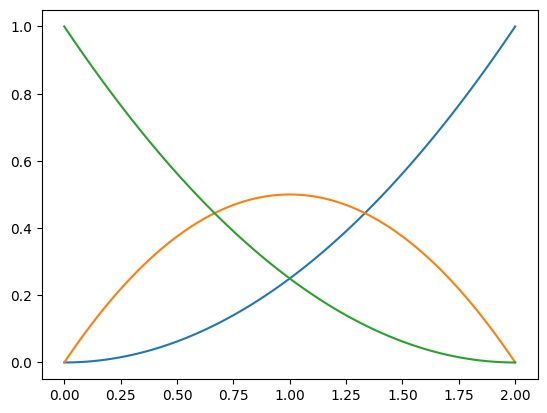

In [14]:
_P001 = Bernstein(degres=2, a=0, b=2)
_P001.coefficients = np.array([0, 0, 1])
_P010 = Bernstein(degres=2, a=0, b=2)
_P010.coefficients = np.array([0, 1, 0])
_P100 = Bernstein(degres=2, a=0, b=2)
_P100.coefficients = np.array([1, 0, 0])

_xs = np.linspace(0, 2, 100)
plt.plot(_xs, _P001.predict(_xs), label='$B_{2,2}$')
plt.plot(_xs, _P010.predict(_xs), label='$B_{2,1}$')
plt.plot(_xs, _P100.predict(_xs), label='$B_{2,0}$')

In [16]:
P2 = Bernstein(degres=2, a=0, b=2)

P2.fit(XS, YS)

_xs = np.linspace(XL, XR, 200)
_ys = inconnue(_xs)
plt.plot(_xs, _ys,color='blue', label='inconnue')



AttributeError: 'Bernstein' object has no attribute 'fit'

# Méthodologie

